In [1]:
from tbw90 import *
import matplotlib.pyplot as plt

----- k_path report begin ----------
real-space lattice vectors
 [[6.405 0.    0.   ]
 [0.    6.405 0.   ]
 [0.    0.    6.405]]
k-space metric tensor
 [[0.02438 0.      0.     ]
 [0.      0.02438 0.     ]
 [0.      0.      0.02438]]
internal coordinates of nodes
 [[0.  0.  0. ]
 [0.5 0.  0. ]
 [0.5 0.5 0. ]
 [0.5 0.5 0.5]
 [0.5 0.  0. ]]
reciprocal-space lattice vectors
 [[0.15613 0.      0.     ]
 [0.      0.15613 0.     ]
 [0.      0.      0.15613]]
cartesian coordinates of nodes
 [[0.      0.      0.     ]
 [0.07806 0.      0.     ]
 [0.07806 0.07806 0.     ]
 [0.07806 0.07806 0.07806]
 [0.07806 0.      0.     ]]
list of segments:
  length = 0.07806  from  [0. 0. 0.]  to  [0.5 0.  0. ]
  length = 0.07806  from  [0.5 0.  0. ]  to  [0.5 0.5 0. ]
  length = 0.07806  from  [0.5 0.5 0. ]  to  [0.5 0.5 0.5]
  length =  0.1104  from  [0.5 0.5 0.5]  to  [0.5 0.  0. ]
node distance list: [0.      0.07806 0.15613 0.23419 0.34459]
node index list:    [  0  23  45  68 100]
----- k_path report 

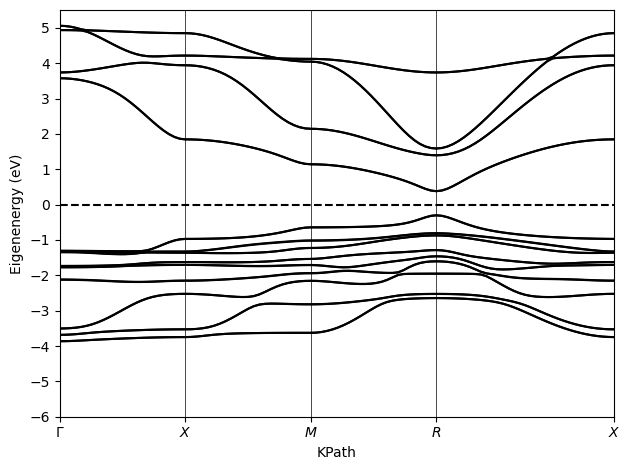

In [2]:
halide=w90(r"halide")

#fermi level
fermi_ev=0.0000000000000000

# tight-binding model without hopping terms
my_model=halide.model(zero_energy=fermi_ev,min_hopping_norm=0.1,max_distance=None,ignorable_imaginary_part=0.01)

# solve model and plot it
path=[[0.0,0.0,0.0],[0.5,0.0, 0.0],[0.5, 0.5,0.0], [0.5,0.5,0.5], [0.5, 0.0, 0.0]]
# labels of the nodes
k_label=(r'$\Gamma$', r'$X$',r'$M$', r'$R$', r'$X$')
# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,101)
#
evals=my_model.solve_all(k_vec)
fig, ax = plt.subplots()
for i in range(evals.shape[0]):
    ax.plot(k_dist,evals[i],"k-")
for n in range(len(k_node)):
    ax.axvline(x=k_node[n],linewidth=0.5, color='k')

# Add a horizontal dashed line at y=0
ax.axhline(0, color='k', linestyle='--')

ax.set_xlabel("KPath")
ax.set_ylabel("Eigenenergy (eV)")
ax.set_xlim(k_dist[0],k_dist[-1])

# Set ytics
yticks = np.arange(-6, 6, 1)  # replace with your desired ytics
ax.set_yticks(yticks)

ax.set_xticks(k_node)
ax.set_xticklabels(k_label)
fig.tight_layout()
fig.savefig("halide.pdf")
plt.show();